In [ ]:
import numpy as np                    #for array and mathematical operations
import pandas as pd                   #for reading csv file
import matplotlib.pyplot as plt       #for plotting our data
import seaborn as sns                 #for plotting data
import math                           #for vavrious math functions
import xgboost as xgb

# **DATA PROCESSING**

In [ ]:
#reading our dataset and parsing unnamed zero column which has time series in the form of date,month,year and time as its
data = pd.read_csv("Turbine_Data.csv", parse_dates = ['Unnamed: 0'], index_col = ['Unnamed: 0'])
data.index = pd.to_datetime(data.index)

In [ ]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [ ]:
data.shape

(95185, 21)

In [ ]:
#showing how many unique values are there in this particular data on the basis of column
data.nunique()

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38946
Blade2PitchAngle                39021
Blade3PitchAngle                39021
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WindDirection                    6664
WindSpeed                       94224
dtype: int64

In [ ]:
#dropping columns having very loess unique values
# data.drop(['ControlBoxTemperature', 'WTG'], axis = 1, inplace = True)

In [ ]:
data.shape

(95185, 19)

In [ ]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [ ]:
#dropping all the rows which are having negative power values
data = data[data['ActivePower'] >= 0]

In [ ]:
data.shape

(78989, 19)

In [ ]:
#checking for no.of null values
data.isna().sum()

ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26821
Blade1PitchAngle                43282
Blade2PitchAngle                43365
Blade3PitchAngle                43365
GearboxBearingTemperature       26819
GearboxOilTemperature           26806
GeneratorRPM                    26810
GeneratorWinding1Temperature    26792
GeneratorWinding2Temperature    26785
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26816
TurbineStatus                   26466
WindDirection                   20429
WindSpeed                         308
dtype: int64

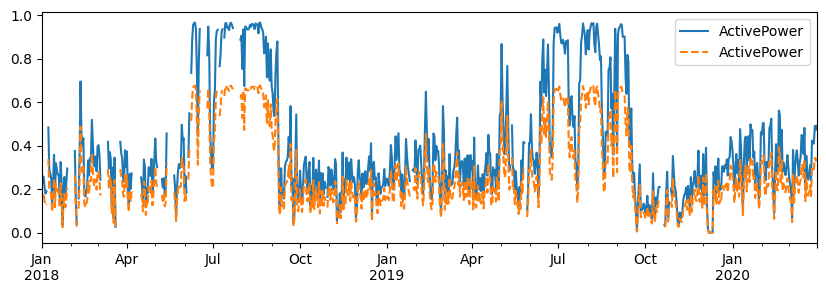

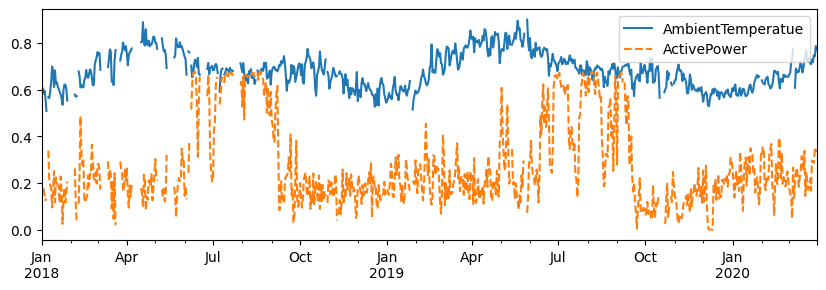

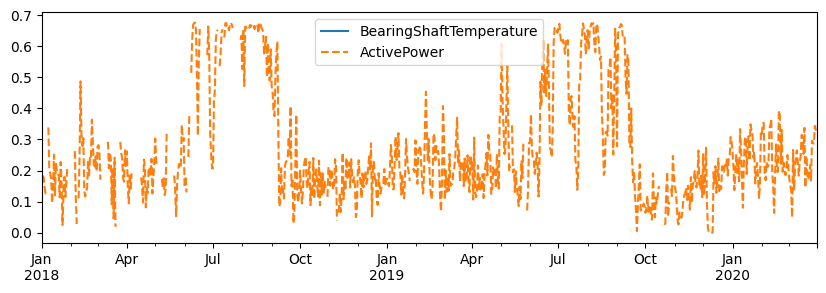

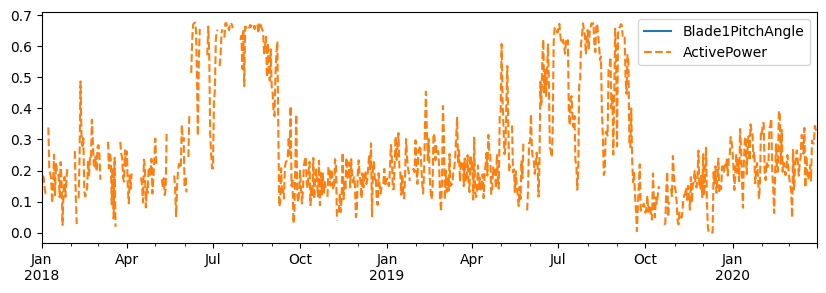

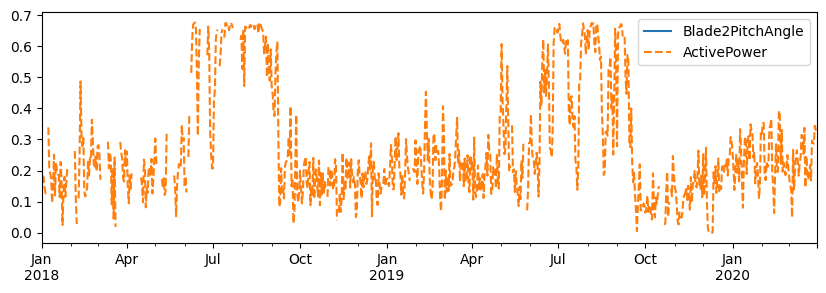

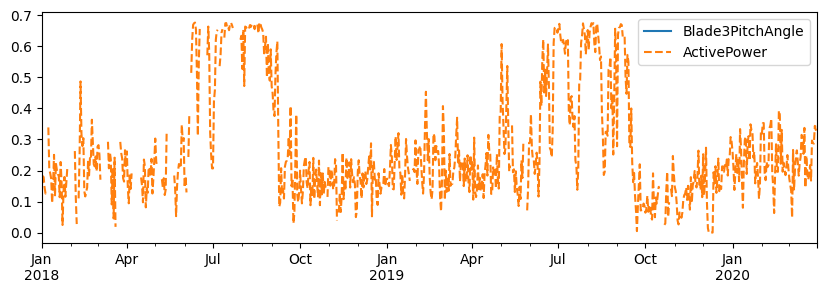

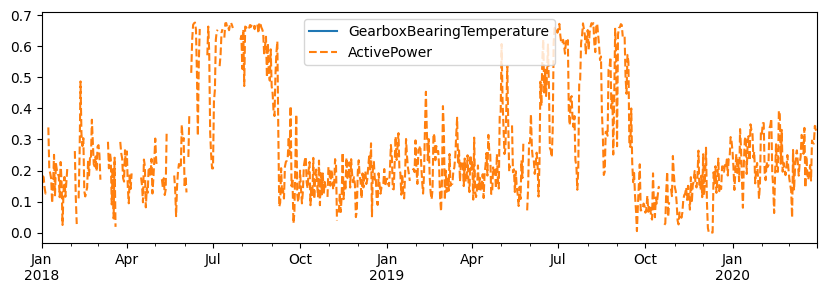

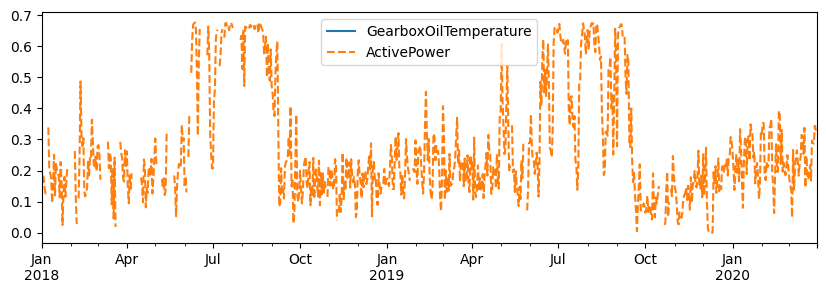

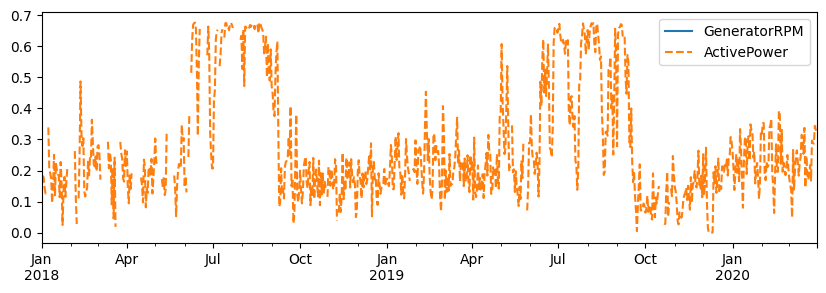

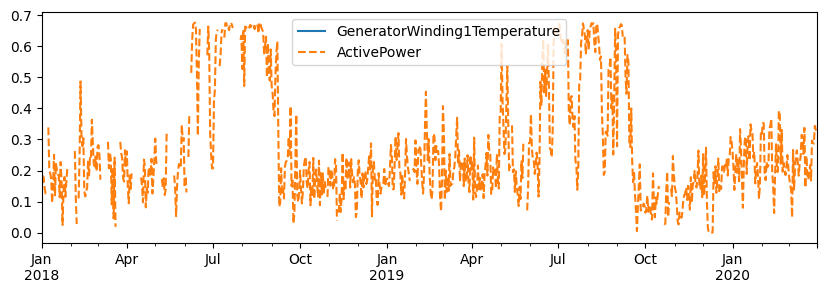

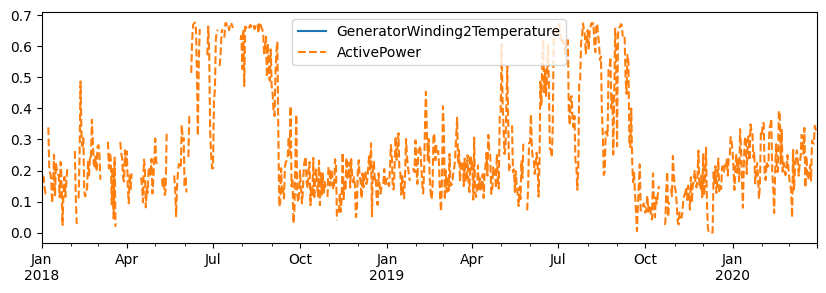

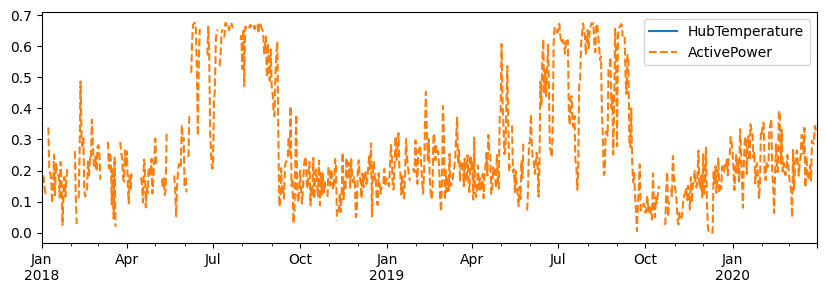

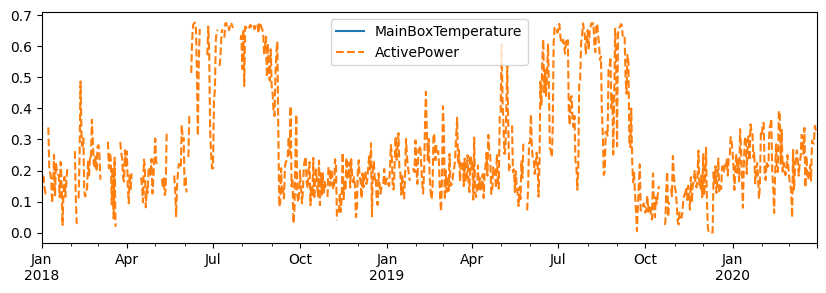

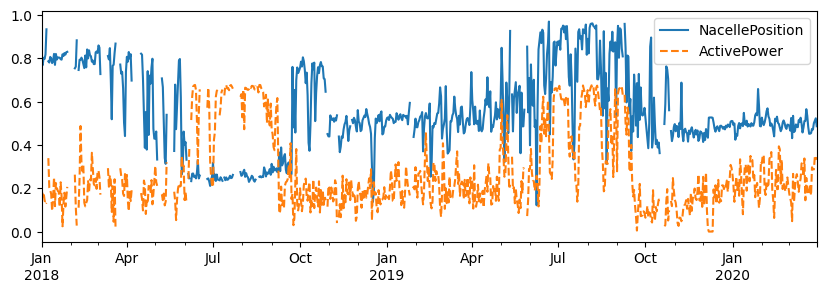

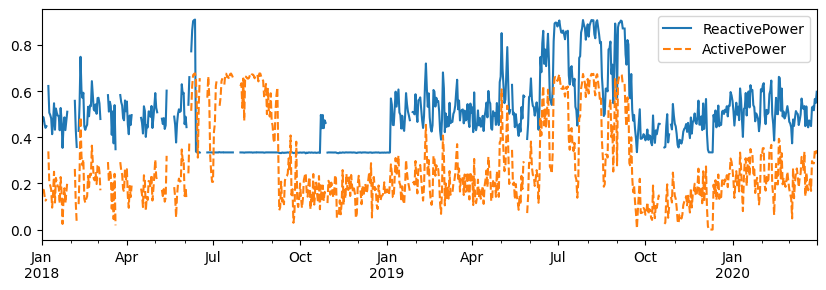

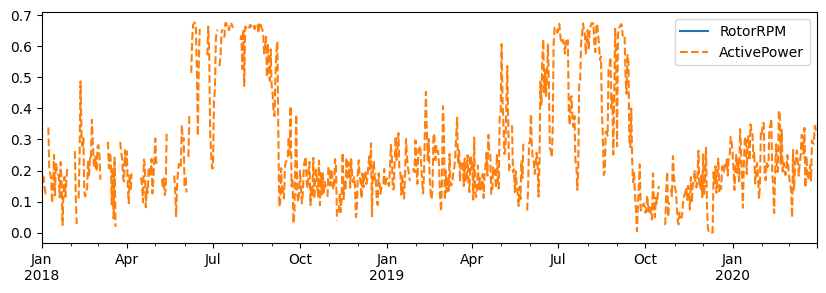

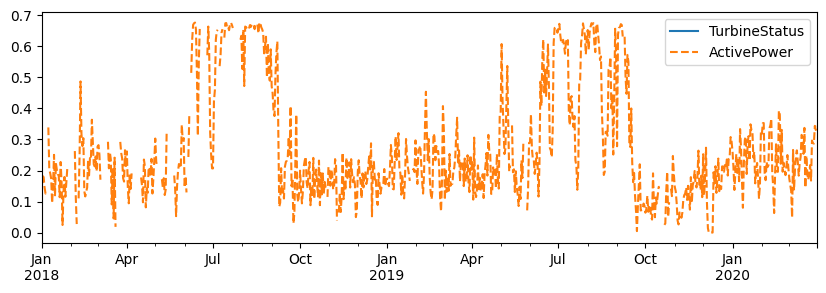

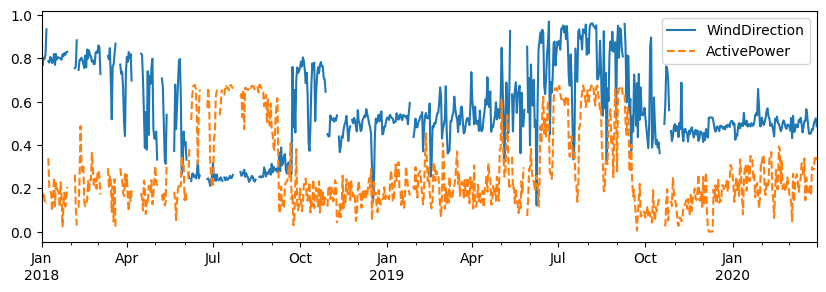

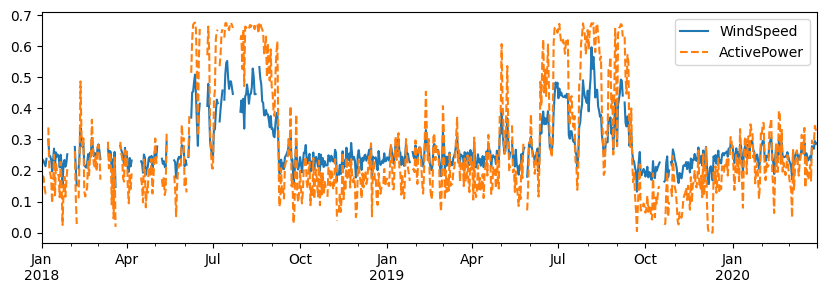

In [ ]:
#we can't drop these many row becasue it will give in accurate model
#so, we have to visualize this data before and see what particular features or feature variables are corelating to our active power
#data visualization
d2 = data.copy()
for i in data:
  #min. , max. scaling for getting data to be normalized and then plotted and compared otherwise we'll get different scales
  mini = min(d2[i])
  maxi = max(d2[i])
  d2[i] = (d2[i] - mini)/(maxi - mini)

  plt.figure(figsize = (10,3))
  #our dataset is in 10 minute interval
  #this following code will give us the mean of 10 minute intervals per day and plot the data
  d2[i].resample('D').mean().plot(legend = i)
  #we are comparing 'active power' to each feature variable and seeing which feature variable has more correlation to avtive power
  (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend = 'ActivePower')
  plt.legend()
  plt.show()

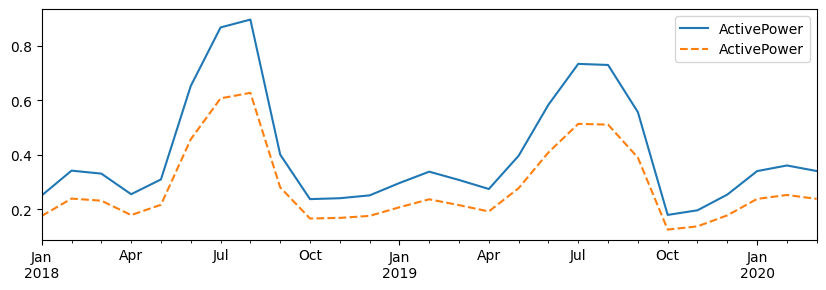

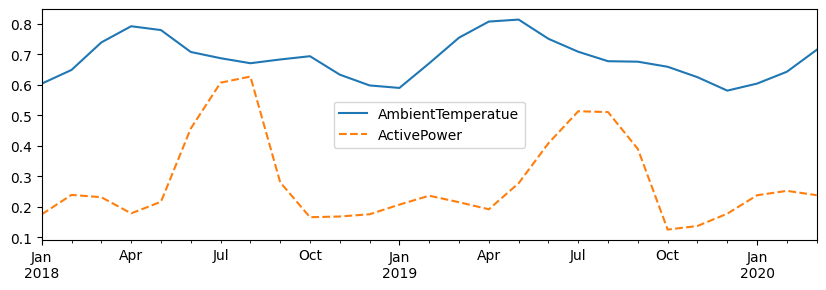

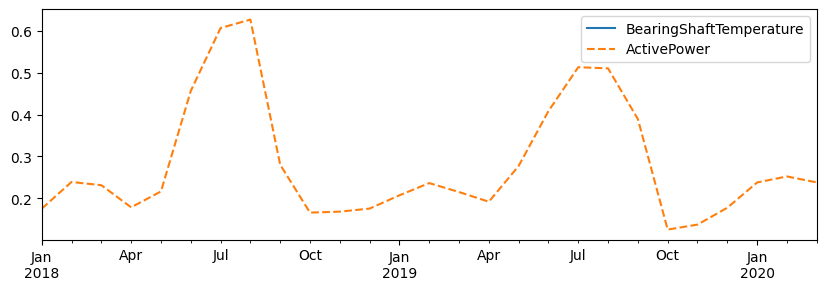

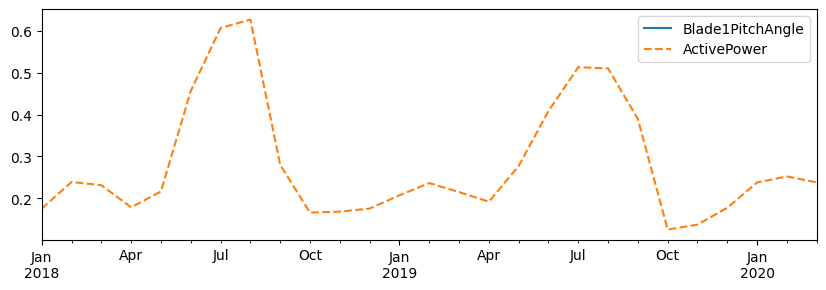

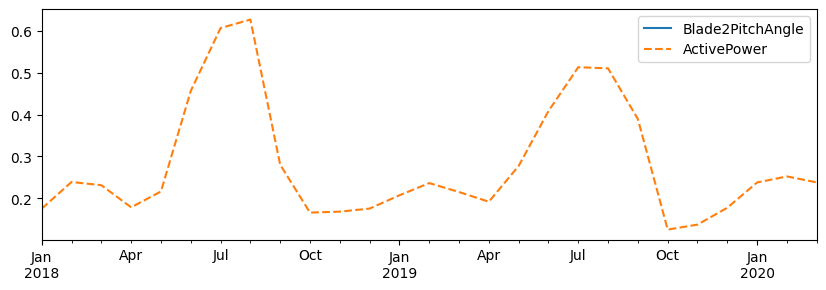

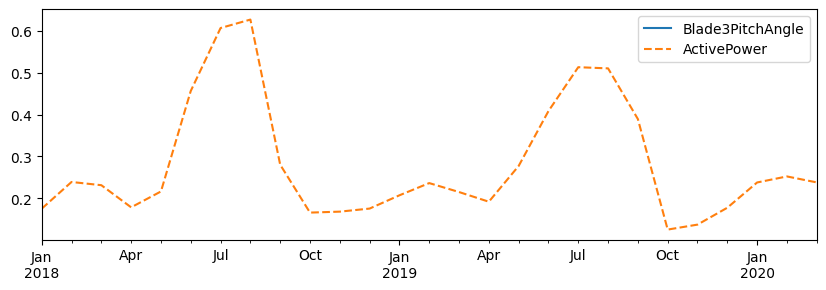

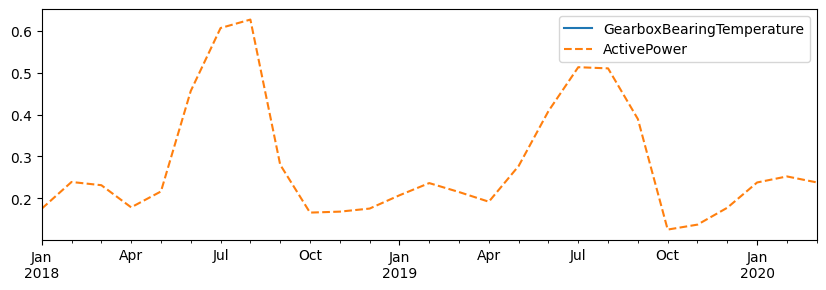

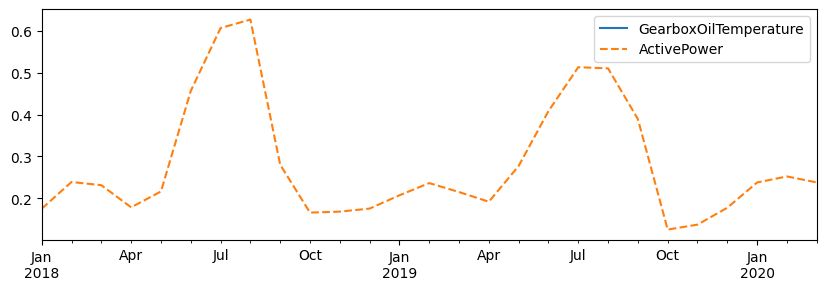

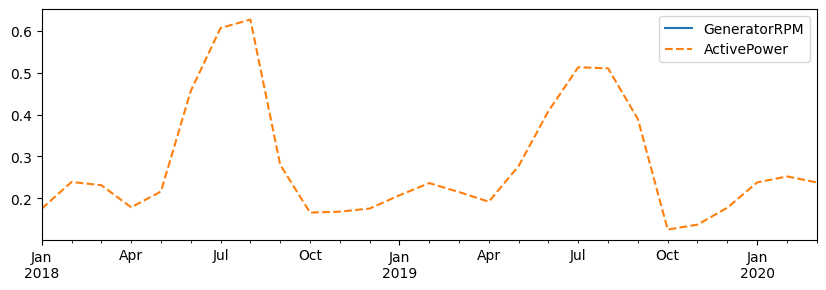

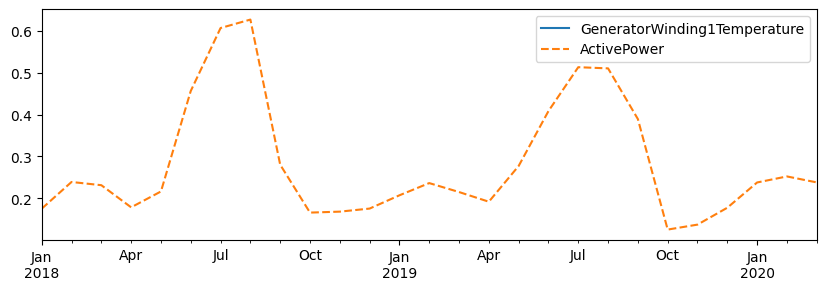

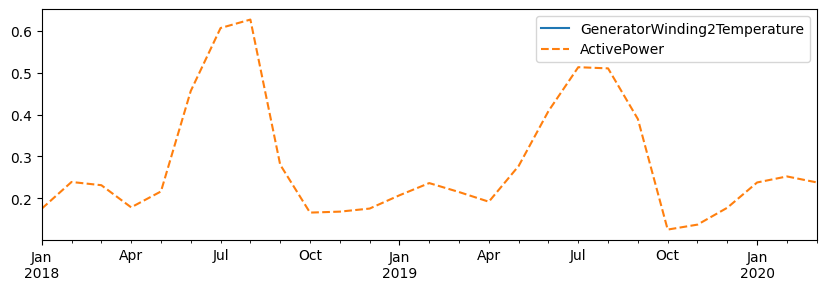

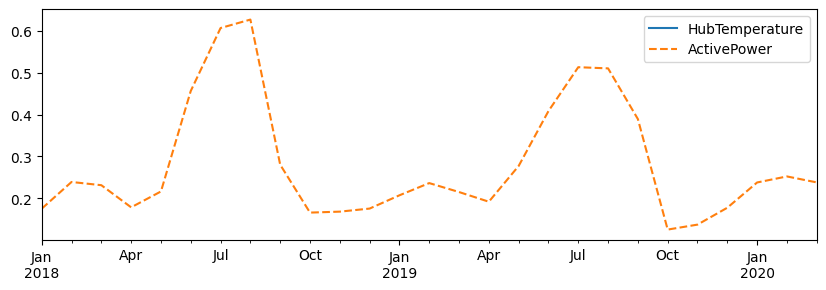

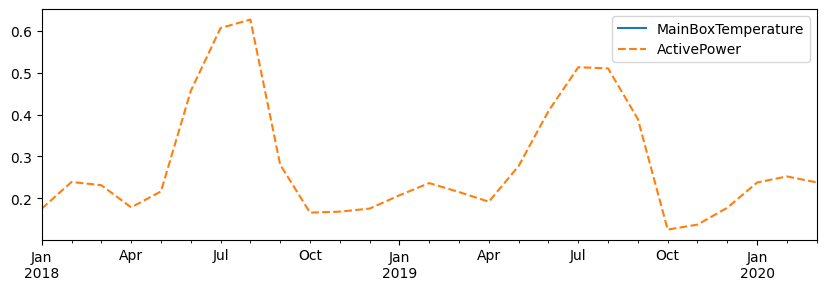

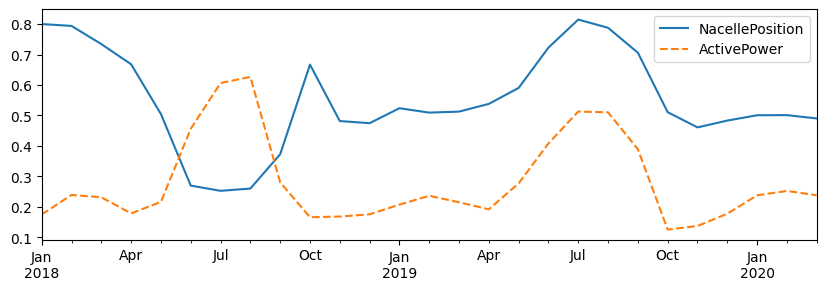

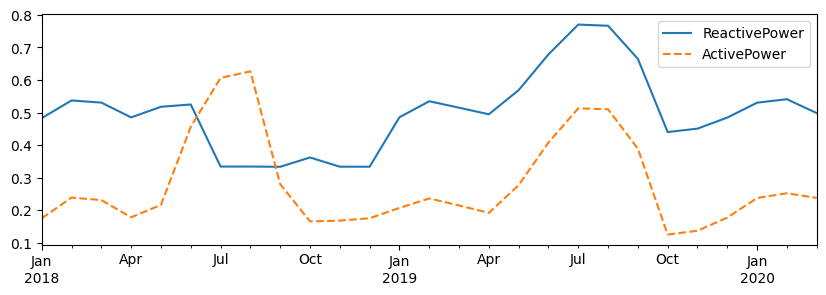

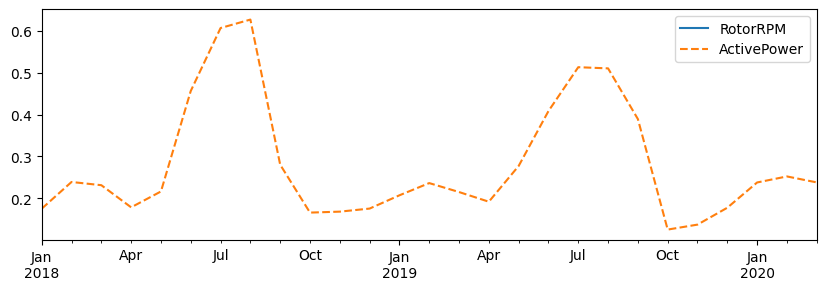

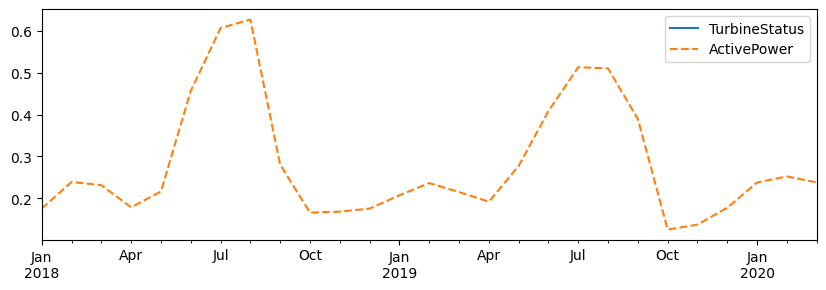

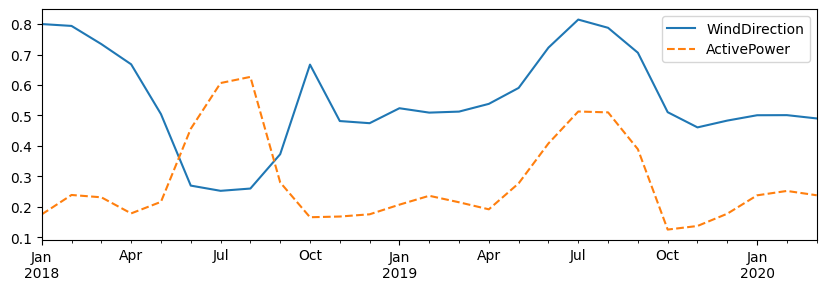

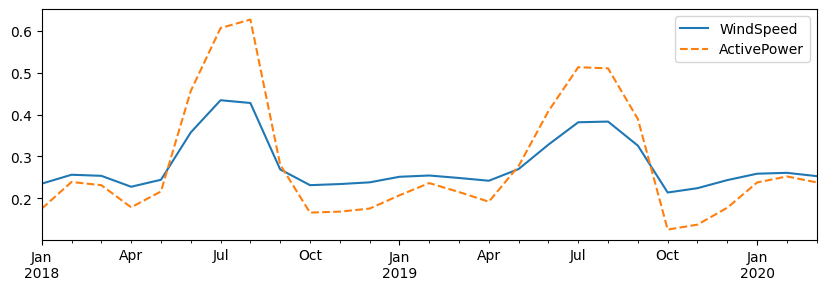

In [ ]:
#by observing above graphs we came to know that 'WindSpeed' and 'ActivePower' have better correlation than any other variable
#so we can proceed our training model based on wind speed
for i in data:
  #sampling our data in terms of months instead of days
  plt.figure(figsize = (10,3))
  d2[i].resample('M').mean().plot(legend = i)
  (d2["ActivePower"]*0.7).resample('M').mean().plot(style = '--', legend = "ActivePower")
  plt.legend()
  plt.show()

<Axes: >

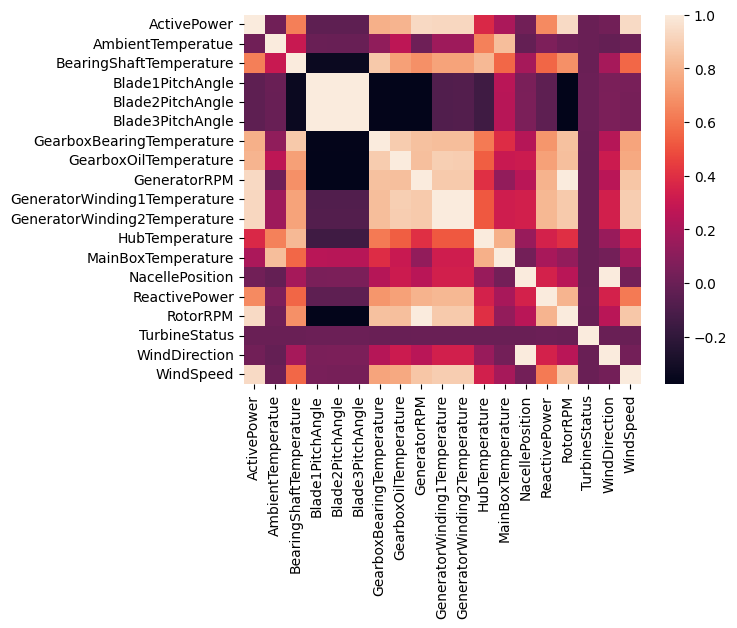

In [ ]:
#quantitative analysis using correlation and heatmap
sns.heatmap(data.corr())

In [ ]:
#unstacking the dataframe and sort the values in descending order to understand which feature variables have very high correlation with active power
correlations = data.corr().unstack().sort_values(ascending = False)

#checking activepower correlations
correlations['ActivePower'].drop_duplicates()

ActivePower                     1.000000
WindSpeed                       0.937870
RotorRPM                        0.935928
GeneratorRPM                    0.934303
GeneratorWinding2Temperature    0.928769
GeneratorWinding1Temperature    0.927517
GearboxOilTemperature           0.801319
GearboxBearingTemperature       0.786150
ReactivePower                   0.662808
BearingShaftTemperature         0.631922
HubTemperature                  0.372788
MainBoxTemperature              0.207514
NacellePosition                 0.024547
AmbientTemperatue               0.019064
TurbineStatus                  -0.001115
Blade1PitchAngle               -0.042637
Blade3PitchAngle               -0.042700
dtype: float64

In [ ]:
#having multiole feature variables with very hig correlation amongst them will cause redundencies and this will decrease the efficiency of our model
#so, we only need 'WindSpeed' to have a very good model which can predict a future active power at very high accuracy
data = data[['ActivePower', 'WindSpeed']]
data.dropna()

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363
...,...,...
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468


In [ ]:
len(data)

78989

In [ ]:
#for splitting our data, our traditional method of train_test_split from sklearn won't work here because it is sequential data
#a time series data needs to be in sequence
#so we have to manually split this data
#in total of 78989, we are splitting 78000 for training and 989 for testing
x_train,x_test,y_train,y_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:], data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(x_train),len(x_test),len(y_train),len(y_test)

(78000, 989, 78000, 989)

# **MODEL TRAINIG AND TESTING**

In [ ]:
#creating a model
model = xgb.XGBRegressor(n_estimator = 200)
#having high no. of n_estimators is like using lot more decision trees and with lot more tree depth, which makes us overfitting
#so accordingly, we have to tune hyper parameter

In [ ]:
#using our training data we have to fit our model and we have evaluation set with our testing data
model.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test, y_test)],
          early_stopping_rounds = 50, verbose = True)
#if loss is not changing after certian point, to stop early we used "early_stopping_rounds"

[08:05:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:669.43821	validation_1-rmse:630.97751
[1]	validation_0-rmse:472.49579	validation_1-rmse:452.89587


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:336.13153	validation_1-rmse:329.72468
[3]	validation_0-rmse:242.74571	validation_1-rmse:245.43169
[4]	validation_0-rmse:180.03659	validation_1-rmse:188.71965
[5]	validation_0-rmse:139.27392	validation_1-rmse:151.41368
[6]	validation_0-rmse:114.02339	validation_1-rmse:127.56200
[7]	validation_0-rmse:99.26300	validation_1-rmse:112.70993
[8]	validation_0-rmse:91.07498	validation_1-rmse:103.68065
[9]	validation_0-rmse:86.73375	validation_1-rmse:98.22847
[10]	validation_0-rmse:84.49390	validation_1-rmse:94.86728
[11]	validation_0-rmse:83.32267	validation_1-rmse:92.74012
[12]	validation_0-rmse:82.74173	validation_1-rmse:91.44646
[13]	validation_0-rmse:82.41217	validation_1-rmse:90.57885
[14]	validation_0-rmse:82.22690	validation_1-rmse:90.03059
[15]	validation_0-rmse:82.03695	validation_1-rmse:89.61250
[16]	validation_0-rmse:81.96316	validation_1-rmse:89.42618
[17]	validation_0-rmse:81.64794	validation_1-rmse:89.25802
[18]	validation_0-rmse:81.60770	validation_1-rmse:89

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=200, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
#predicting using our model
pred = model.predict(x_test)

In [ ]:
#creating new dataframe for actual values that were there in original set and predictions that are our model has done
df_final = pd.DataFrame(data = {'Actuals': y_test, 'Predictions': pred})

In [ ]:
#determining different metrics of our prediction
from sklearn.metrics import *

print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions'])))

The Coefficient of determination (R-squared) = 0.970
The mean absolute error (MAE)                = 63.13
The RMSE error (RMSE)                        = 88.84
The Mean absolute percentage error (MAPE)    = 0.476


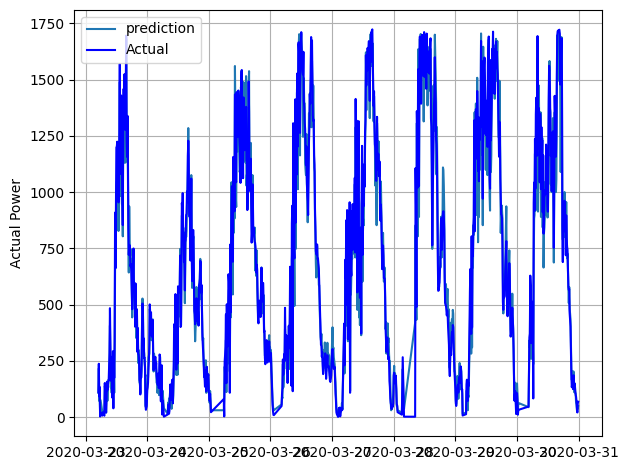

In [ ]:
#visualizing our prediction and comparing it with our actual data
plt.plot(df_final['Predictions'], label = 'prediction')
plt.plot(df_final['Actuals'], color = 'blue', label = 'Actual')
plt.ylabel("Actual Power")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<Axes: ylabel='ActivePower'>

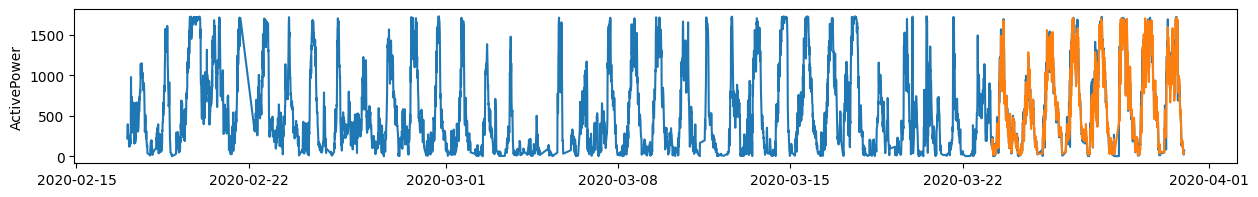

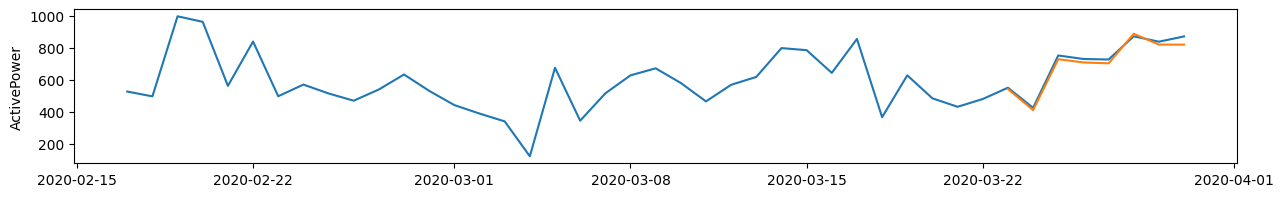

In [ ]:
#plotting entire dataset with predicted values and visualize the predictions
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_final['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean())
sns.lineplot(data = df_final['Predictions'].resample('D').mean())

In [ ]:
#first graph shows the sampling of 10 mintues frquency and we considered last part of the graph beacuse of too many data points
#second graph is after resampling the entire dataframe in days and here we don't have frequency of 10 minutes but frequency of days of each day. and we considered last part of it

# **PREDICTING FUTURE UNSEEN VALUES**

In [ ]:
#what if we don't have WindSpeed and we have to predict future unseen values(dates not included or dates after actual dataset)
#we have to generate our own features using date time that is given in the dataset and train the model to predict the target variables(Active Power)
#not as accurate as wind speed

In [ ]:
data.tail()

,ActivePower,WindSpeed
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468
2020-03-30 23:50:00+00:00,68.664425,3.475205


In [ ]:
#creating empty dataframe with future dates
new = pd.date_range('2020-04-01 12:00:00+00:00','2020-06-01 12:00:00+00:00', freq='10min')
#passing that result to a dataframe as index
new = pd.DataFrame(index=new)

In [ ]:
len(new)

8785

In [ ]:
#generate new features for our model to train on
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week

    return df

In [ ]:
data2 = data.copy()
data2 = create_f(data2)

In [ ]:
data2.head()

,ActivePower,WindSpeed,hour,minute,day,month,year,dayofweek,dayofyear,weekofyear
2018-01-01 06:20:00+00:00,26.212347,3.042750,6,20,1,1,2018,0,1,1
2018-01-01 06:40:00+00:00,59.632658,3.424814,6,40,1,1,2018,0,1,1
2018-01-01 06:50:00+00:00,40.889650,3.507172,6,50,1,1,2018,0,1,1
2018-01-01 10:40:00+00:00,34.398111,3.442212,10,40,1,1,2018,0,1,1
2018-01-01 12:00:00+00:00,29.797653,3.031363,12,0,1,1,2018,0,1,1


In [ ]:
data2.columns

Index(['ActivePower', 'WindSpeed', 'hour', 'minute', 'day', 'month', 'year',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [ ]:
data.isna().sum()
data2 = data2.dropna()

In [ ]:
features = ['hour', 'minute', 'day', 'month', 'year','dayofweek', 'dayofyear']
label = 'ActivePower'

In [ ]:
#splitting our dataset into training and testing
x_train, x_test, y_train,y_test = data2[features][0:78000], data2[features][78000:], data2[label][0:78000],  data2[label][78000:]
len(x_train),len(x_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

In [ ]:
#creating model with estimators as 1000 and learning rate = 0.01
model2 = xgb.XGBRegressor(n_estimators = 1000,learning_rate=0.01)
#fitting the model
model2.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
          early_stopping_rounds=50,verbose=True)

[0]	validation_0-rmse:939.67225	validation_1-rmse:945.87244
[1]	validation_0-rmse:931.87864	validation_1-rmse:941.88671
[2]	validation_0-rmse:924.17594	validation_1-rmse:937.94857
[3]	validation_0-rmse:916.55866	validation_1-rmse:933.67564
[4]	validation_0-rmse:909.03092	validation_1-rmse:929.83594
[5]	validation_0-rmse:901.58205	validation_1-rmse:925.58036
[6]	validation_0-rmse:894.21682	validation_1-rmse:921.37492
[7]	validation_0-rmse:886.95871	validation_1-rmse:917.21912
[8]	validation_0-rmse:879.75955	validation_1-rmse:912.95882
[9]	validation_0-rmse:872.69263	validation_1-rmse:908.74805
[10]	validation_0-rmse:865.71019	validation_1-rmse:904.58635
[11]	validation_0-rmse:858.78344	validation_1-rmse:901.06352
[12]	validation_0-rmse:851.92258	validation_1-rmse:896.99494
[13]	validation_0-rmse:845.14439	validation_1-rmse:892.97386
[14]	validation_0-rmse:838.45226	validation_1-rmse:889.15303
[15]	validation_0-rmse:831.83522	validation_1-rmse:885.22593
[16]	validation_0-rmse:825.29864	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#predicting using X_test
pred = model2.predict(x_test)

In [ ]:
#creating new dataframe having actual data and predictions
df_final2 = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred})

In [ ]:
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final2['Actuals'],df_final2['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final2['Actuals'],df_final2['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final2['Actuals'],df_final2['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final2['Actuals'],df_final2['Predictions'])))

The Coefficient of determination (R-squared) = -0.042
The mean absolute error (MAE)                = 409.57
The RMSE error (RMSE)                        = 541.83
The Mean absolute percentage error (MAPE)    = 2.201


<Axes: ylabel='ActivePower'>

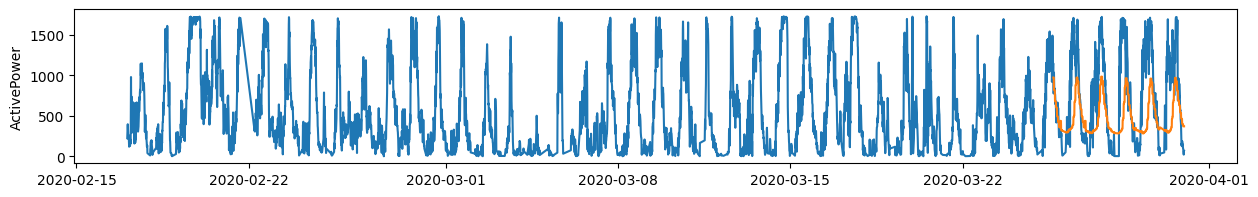

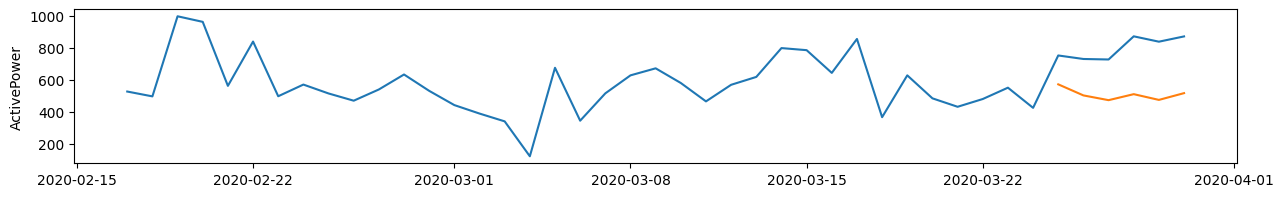

In [ ]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = df_final2['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = df_final2['Predictions'].resample('D').mean())

In [ ]:
#for future data
new = create_f(new)
print(new[features].head())
fut = model2.predict(new[features])
future = pd.DataFrame(data={'Predictions':fut}, index = new.index)

                           hour  minute  day  month  year  dayofweek  \
2020-04-01 12:00:00+00:00    12       0    1      4  2020          2   
2020-04-01 12:10:00+00:00    12      10    1      4  2020          2   
2020-04-01 12:20:00+00:00    12      20    1      4  2020          2   
2020-04-01 12:30:00+00:00    12      30    1      4  2020          2   
2020-04-01 12:40:00+00:00    12      40    1      4  2020          2   

                           dayofyear  
2020-04-01 12:00:00+00:00         92  
2020-04-01 12:10:00+00:00         92  
2020-04-01 12:20:00+00:00         92  
2020-04-01 12:30:00+00:00         92  
2020-04-01 12:40:00+00:00         92  


<Axes: ylabel='ActivePower'>

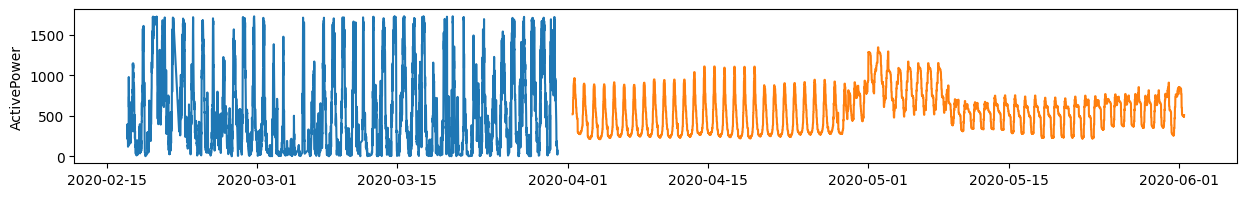

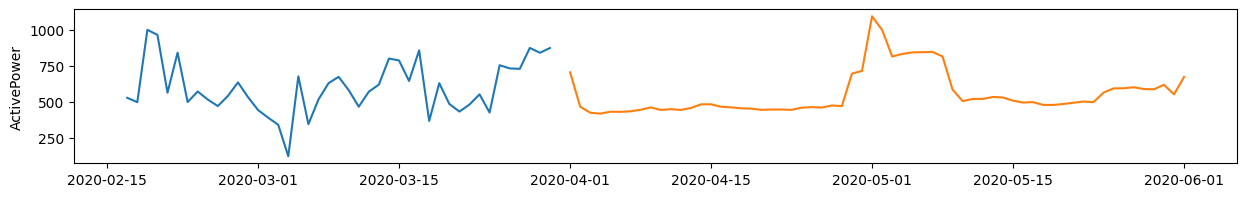

In [ ]:
#plotting new predictions
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = future['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = future['Predictions'].resample('D').mean())

In [ ]:
#save the model so that we can use it in flask app for future
#as it is not a keras model we can use pickle
import pickle
file_name = "model2new.pkl"
model.save_model('modelnew.json')
#dumping our model in the pickle file
pickle.dump(model2, open(file_name, "wb"))